In [20]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from NPw_aux import prepare_ion_data
import warnings
import os
warnings.filterwarnings("ignore")
import logging
datapath = os.environ.get("DATA_PATH")
if datapath == None:
    raise KeyError("Enviromental variable data path has to be declared")
print(datapath)
from datetime import datetime, timedelta
freq = timedelta(minutes=30)
logging.disable(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/carloscano/data/


In [21]:
#df_GNSSTEC,df_covariate, df_eq = prepare_ion_data(datapath, "GRK", freq)

In [22]:
#df_GNSSTEC.to_pickle("df_GNSSTEC.pkl")
#df_covariate.to_pickle("df_covariate.pkl")
#df_eq.to_pickle("df_eq.pkl")

In [23]:
import pandas as pd
df_GNSSTEC = pd.read_pickle("../data_test/df_GNSSTEC.pkl")
df_covariate = pd.read_pickle("../data_test/df_covariate.pkl")
df_eq = pd.read_pickle("../data_test/df_eq.pkl")
n_forecasts = 48


In [24]:
%matplotlib inline
from aux_function_SR import read_data, get_eq_filtered, SR_SENSORS
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level, save, load
import logging
import pandas as pd

import pickle
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast
from dataclasses import dataclass, asdict
from dateutil.relativedelta import *

import ast

import sys
import dateutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import TCNModel, RNNModel
from darts.dataprocessing.transformers import Scaler,MissingValuesFiller
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape, r2_score
from darts.utils.missing_values import fill_missing_values
from darts.datasets import AirPassengersDataset, SunspotsDataset, EnergyDataset

from NPw import NPw

import pandas as pd

from darts.models import TCNModel
import darts.utils.timeseries_generation as tg
from darts.utils.likelihood_models import GaussianLikelihood
from darts.datasets import EnergyDataset
from darts.utils.missing_values import fill_missing_values
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from NPw_aux import prepare_EQ, ConfigEQ


In [25]:

ConfigEQ_d = {
    "dist_start": 100,
    "dist_delta": 6000,
    "mag_start": 4.5,
    "mag_delta": 2,
    "filter": 1,
    "drop": ["arc_cos", "arc_sin","depth", "mag", "dist"],
}
config_events = ConfigEQ(**ConfigEQ_d)

df_regressor = df_GNSSTEC.reset_index()
df_other = df_covariate
df_events = prepare_EQ(df_eq, config_events)    
forecast_length = timedelta(hours=24)
question_mark_length = timedelta(hours=24)
# Time to take into account to predict 
historic_lenght =  timedelta(days=5)
training_lenght = timedelta(days=30)

In [26]:
from darts import TimeSeries

In [27]:
from DartsFCeV import NLinearDartsFCeVConfig,TransformerDartsFCeVConfig, DartsFCeVConfig,NHITSDartsFCeVConfig, NBEATSDartsFCeVConfig,RNNDartsFCeVConfig,TCNDartsFCeVConfig, TFTDartsFCeVConfig

from FCeV import FCeV, FCeVConfig

TCN_darts_FCeV_config = {
"dilation_base": 2,
"weight_norm": True,
#"kernel_size": 16,
#"num_filter": 1000
}


RNN_darts_FCeV_config = {
     "RNNmodel": "RNN"
}
RNN_darts_FCeV_config = RNNDartsFCeVConfig(**RNN_darts_FCeV_config)

NBEATS_darts_FCeV_config = {
    "num_stacks": 10,
    #"num_layers": 10,
    "num_blocks": 10,
    #"layer_widths": 10,
    "expansion_coefficient_dim": 10
}


NHITS_darts_FCeV_config = {
    "num_stacks": 10,
    #"num_layers": 10,
    "num_blocks": 10,
    #"layer_widths": 10,
    "expansion_coefficient_dim": 10,
    "max_pool_1d": True
}

TFT_darts_FCeV_config = {
    #"lstm_layers" : 2,
    #"hidden_size" : 64,
    "num_attention_heads" : 4,
    "full_attention" : False,
    "add_relative_index": False,
    "hidden_continuous_size" : 8,
}
TFT_darts_FCeV_config = TFTDartsFCeVConfig(**TFT_darts_FCeV_config)


NLinear_darts_FCeV_config = {
"const_init": True,
}
TCN_darts_FCeV_config = TCNDartsFCeVConfig(**TCN_darts_FCeV_config)



NBEATS_darts_FCeV_config = NBEATSDartsFCeVConfig(**NBEATS_darts_FCeV_config)

NHITS_darts_FCeV_config = NHITSDartsFCeVConfig(**NHITS_darts_FCeV_config)


NLinear_darts_FCeV_config = NLinearDartsFCeVConfig(**NLinear_darts_FCeV_config)
 #assert self.head_dim * num_heads == self.embed_dim, 
Transformer_darts_FCeV_config = {
    #"d_model": 12,
    "n_head_divisor": 6,
    #"num_encoder_layers": 3,
    #"num_decoder_layers": 3,
    "dim_feedforward": 512
}
Transformer_darts_FCeV_config = TransformerDartsFCeVConfig(**Transformer_darts_FCeV_config)

darts_FCev_config = {
    "DartsModelConfig": RNN_darts_FCeV_config,
    "dropout":0.3,
    "n_epochs":200,
    "n_layers": 1,
    "internal_size": 8,
    "batch_size":1200 ,
    "learning_rate": 1e-1,
    "use_gpu": True,
    "event_type": "Non-Binary",
    "patience":25,
    "seed": 1234567,
    "probabilistic": True,
    "config_synthetic": "constant"
}
darts_FCeV_config = DartsFCeVConfig(**darts_FCev_config)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
train_day = datetime.fromisoformat("2018-10-01T00:00:00")
val_day = datetime.fromisoformat("2019-01-01T00:00:00")
forecast_length = timedelta(hours=24)
question_mark_length = timedelta(hours=24)
# Time to take into account to predict 
historic_lenght =  timedelta(days=24)
training_lenght = timedelta(days=272)
freq = pd.Timedelta(minutes=30)

FCev_config = {
    "freq": freq,
    "forecast_length": forecast_length,
    "question_mark_length": question_mark_length,
    "training_length": training_lenght,
    "verbose": False,
    "input_length": historic_lenght
}


FCev_config = FCeVConfig(**FCev_config)

In [29]:
#synthetic_events = pd.read_pickle("../data_test/synthetic.pkl")
#df_synth = prepare_EQ(synthetic_events, config_events)  
output_path = "results/"
synthetic_events = df_covariate[["f107"]].quantile([.1,0.25, .5,0.75, .9])#.drop(["count", "std"])
synthetic_events = pd.DataFrame(np.linspace(60, 80, 21), columns= ["f107"])

case = "TEC_constant"
if case == "TEC_constant":
    df_all = df_covariate[["f107"]]
    synthetic_events = pd.DataFrame(np.arange(60, 85, 1), columns= ["f107"])
    df_covariate = df_covariate.drop("f107", axis = 1)
elif case == "TEC_EQ": 
    values = np.arange(0,21,1)
    synthetic_events = pd.DataFrame(values, columns= ["pr"])
    df_all = pd.DataFrame()
    for ix, eq in df_events.sort_values(by=["pr"]).iterrows():
        event = pd.DataFrame(eq).T
        start_time = event.index[0]
        end_time = start_time + forecast_length - freq
        index = pd.date_range(start_time, end_time, freq = freq)
        df = pd.DataFrame(np.repeat(event.values, len(index)), columns = df_events.columns, index=index)
        df_all = df.combine_first(df_all)
else:
    print(f"Not implemented")
    
 

In [30]:
   
current_fcev = FCeV(FCev_config, darts_FCeV_config, df_GNSSTEC, df_covariate,df_all,  output_path, synthetic_events)

In [31]:
max_interations = 0
for current_index in range(max_interations):
    current_fcev = FCeV(FCev_config, darts_FCeV_config, df_GNSSTEC, df_covariate,df_all,  output_path, synthetic_events)
    current_fcev.create_iteration(pd.Timestamp(2018,1,1, 12, 0), max_interations)
    df_fore = current_fcev.process_iteration(current_index)
    current_fcev.save_results(df_fore)

In [32]:
import pandas_bokeh
import pandas as pd
pandas_bokeh.output_notebook()
pd.plotting.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
pd.options.plotting.backend = "plotly" 
df_events.plot()

Loading BokehJS ...

Loading BokehJS ...

FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=pr<br>dates=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'pr',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'pr',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'uid': '70ef81bb-3220-4fb6-aad3-ef8dacc39052',
              'x': array([datetime.datetime(2016, 1, 3, 23, 0),
                          datetime.datetime(2016, 1, 24, 10, 30),
                          datetime.datetime(2016, 1, 25, 4, 0),
                          datetime.datetime(2016, 1, 30, 3, 0),
                          datetime.datetime(2016, 2, 15, 18, 30),
                          datetime.datetime(2016, 3, 2, 12, 30),
                          datetime.datetime(2016, 3, 29, 1, 0),
                          datetime.datetime(2016, 4, 10, 10, 0),
      

In [33]:
max_interations = 12
current_fcev.create_folds(pd.Timestamp(2018,1,1, 12, 0), max_interations)
iteration = 0
from func_timeout import func_set_timeout, FunctionTimedOut
@func_set_timeout(3600)
def train_with_timeout(fcev_instance, iteration):
    df_fore = current_fcev.process_fold(iteration)
    return df_fore

2016-01-01 00:00:00


In [34]:
try:
    df_fore = train_with_timeout(current_fcev, iteration)
except FunctionTimedOut: 
    print(np.nan)
    #sys.exit(0)
    #Missing covariates; could not find past covariates in index value range: 2019-11-02 14:30:00 - 2019-11-04 14:00:00.

In [104]:
df.columns = df.columns.str.split("_", expand=True)
df.mean(level=0, axis = 1).sub(df_fore["current"]).pow(2).mean().pow(1/2).mean()

15.190336

In [142]:
df = df_fore_2["BASE"]
df.columns = df.columns.str.split("_", expand=True)
df.columns.nlevels 

[autoreload of DartsFCeV failed: Traceback (most recent call last):
  File "/home/carloscano/anaconda3/envs/neuralprophet/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/home/carloscano/anaconda3/envs/neuralprophet/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/home/carloscano/anaconda3/envs/neuralprophet/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/carloscano/dev/NeuralProphetEQ/notebooks/../DartsFCeV.py", l

1

In [35]:
df_fore["current"]

current                                 
                          larm       dyng       duth       noa1
ds                                                             
2018-03-25 18:30:00  23.261168  20.212999  21.158501  21.214333
2018-03-25 19:00:00  22.976334  19.527666  21.101833  20.758833
2018-03-25 19:30:00  22.445333  19.011333  20.573999  20.446167
2018-03-25 20:00:00  21.875500  18.710833  19.881165  20.352667
2018-03-25 20:30:00  21.415501  18.462833  19.486166  20.268667
2018-03-25 21:00:00  21.402334  18.393167  19.585333  20.304001
2018-03-25 21:30:00  21.414333  18.260000  19.759167  20.396334
2018-03-25 22:00:00  21.115334  17.520666  19.630333  19.938999
2018-03-25 22:30:00  20.811333  16.838833  19.288334  19.367001
2018-03-25 23:00:00  20.101833  16.254333  18.538834  18.554333
2018-03-25 23:30:00  19.662834  16.081167  18.310833  18.161665
2018-03-26 00:00:00  20.743000  17.390333  19.272499  19.322166
2018-03-26 00:30:00  20.707167  17.919333  19.572500  19.501499
2018-03-26 01:00:00  20.770002  18.385666  19.888000  19.764168
2018-03-26 01:30:00  20.831499  18.567667  19.915333  19.917999
2018-03-26 02:00:00  20.386833  18.408001  19.429501  19.666334
2018-03-26 02:30:00  19.856667  17.944164  18.925501  19.141834
2018-03-26 03:00:00  19.220667  17.156500  18.412165  18.485500
2018-03-26 03:30:00  18.887667  16.396000  18.153667  18.199167
2018-03-26 04:00:00  19.482334  16.548834  18.805500  18.869333
2018-03-26 04:30:00  20.275333  17.262667  19.402834  19.701334
2018-03-26 05:00:00  21.046501  18.108500  19.763834  20.364834
2018-03-26 05:30:00  22.157499  19.167833  20.589001  21.320168
2018-03-26 06:00:00  23.612167  20.697500  21.778667  22.587166
2018-03-26 06:30:00  25.046833  22.100666  22.966667  23.789833
2018-03-26 07:00:00  25.503500  22.917166  23.432167  24.377668
2018-03-26 07:30:00  25.358500  23.399166  23.289000  24.537502
2018-03-26 08:00:00  25.486000  24.000334  23.452333  24.918833
2018-03-26 08:30:00  25.772333  24.660833  23.839333  25.506666
2018-03-26 09:00:00  25.582165  24.633833  23.976166  25.497168
2018-03-26 09:30:00  25.386000  24.524834  24.029333  25.479666
2018-03-26 10:00:00  25.267666  24.580500  24.034166  25.539167
2018-03-26 10:30:00  25.967501  25.146000  24.417833  26.008333
2018-03-26 11:00:00  27.346167  26.550333  25.195000  27.238667
2018-03-26 11:30:00  28.170334  27.130667  25.692669  27.698668
2018-03-26 12:00:00  28.134333  26.911667  25.322166  27.366167
2018-03-26 12:30:00  27.205667  26.013000  24.285000  26.385334
2018-03-26 13:00:00  26.116167  24.865000  23.275000  25.261999
2018-03-26 13:30:00  25.699167  24.374666  22.963499  24.940001
2018-03-26 14:00:00  25.339167  24.186501  23.060667  24.854166
2018-03-26 14:30:00  25.186666  24.136833  22.993000  24.789499
2018-03-26 15:00:00  25.511833  24.417500  23.104666  25.002832
2018-03-26 15:30:00  26.249166  25.050167  23.608500  25.582834
2018-03-26 16:00:00  26.576000  25.056999  23.830166  25.620001
2018-03-26 16:30:00  26.361000  24.346502  23.697166  24.956333
2018-03-26 17:00:00  25.442833  23.378166  23.115000  24.028833
2018-03-26 17:30:00  24.320333  22.191833  22.109833  22.932667
2018-03-26 18:00:00  23.198668  20.675501  21.296000  21.612333

In [36]:
df = df_fore["BASE"]
current = df_fore["current"].droplevel(0, 1)
for idx, group in df.groupby(level=0, axis = 1):
    #print(group.droplevel(0, axis = 1).head(40))
    print(group.droplevel(0, 1).head())
    print(current.head())
    print(group.droplevel(0, 1).sub(current).head(5))
    break

                          larm       dyng       duth       noa1
ds                                                             
2018-03-25 18:30:00  21.700514  19.203056  22.818970  23.037041
2018-03-25 19:00:00  25.904152  20.709625  20.389967  24.872541
2018-03-25 19:30:00  25.324610  22.074677  23.045818  24.694365
2018-03-25 20:00:00  26.279167  21.579689  24.364325  24.122162
2018-03-25 20:30:00  23.313046  22.255526  24.309410  22.855436
                          larm       dyng       duth       noa1
ds                                                             
2018-03-25 18:30:00  23.261168  20.212999  21.158501  21.214333
2018-03-25 19:00:00  22.976334  19.527666  21.101833  20.758833
2018-03-25 19:30:00  22.445333  19.011333  20.573999  20.446167
2018-03-25 20:00:00  21.875500  18.710833  19.881165  20.352667
2018-03-25 20:30:00  21.415501  18.462833  19.486166  20.268667
                         larm      dyng      duth      noa1
ds                                          

In [37]:
rmse_of_mean = df.mean(level=1, axis = 1).sub(df_fore["current"].droplevel(0, 1)).pow(2).mean().pow(1/2).mean()

In [52]:
df.columns.nlevels

2

In [98]:
len(df.groupby(level=0, axis = 1))

1

In [96]:
df.groupby(level=0, axis = 1).sub(current).pow(2).mean().pow(1/2).div(current.mean(0)).mean

AttributeError: 'DataFrameGroupBy' object has no attribute 'sub'

In [41]:
df = df_fore["BASE"].copy()

current = df_fore["current"].droplevel(0, 1)

mean_of_rmse = 0
for idx, group in df.groupby(level=0, axis = 1):
    mean_of_rmse = mean_of_rmse + group.droplevel(0, 1).sub(current).pow(2).mean().pow(1/2).mean() 
    print(mean_of_rmse)
mean_of_rmse =  ( mean_of_rmse /  len(df.groupby(level=0, axis = 1)))


print(f"mean of rmse {mean_of_rmse}")

8.84280014038086
22.659475326538086
36.70939254760742
48.41096782684326
50.85789608955383
54.35535979270935
77.59263777732849
81.14881014823914
85.06585335731506
89.2447988986969
93.6324851512909
118.59646677970886
121.93311429023743
128.2057282924652
132.91501116752625
137.7574384212494
140.8079068660736
145.21708130836487
148.45909214019775
152.65786933898926
162.85379219055176
167.15241527557373
170.5965278148651
173.98091006278992
179.00609755516052
182.36432003974915
194.40894627571106
198.3328857421875
214.74151039123535
222.49708557128906
228.64840602874756
252.6525239944458
256.7565407752991
261.1017780303955
276.15094470977783
279.073157787323
286.1873950958252
288.1293454170227
298.59868001937866
307.4080157279968
320.26763677597046
323.4927487373352
327.1087567806244
331.3285357952118
339.1840307712555
342.7552242279053
346.1033501625061
367.89385652542114
376.1035418510437
394.0312991142273
398.68870401382446
402.4707999229431
422.8725562095642
426.1719739437103
434.9484870

In [46]:
from FCeV import METRICS
FCeV.get_metrics_from_fc(df_fore["current"],df_fore["BASE"], METRICS.RMSE)

8.099616758823394

In [ ]:
current_fcev.save_results(df_fore)

In [ ]:
df_main = df_fore["BASE"]
from FCeV import METRICS
current_ts = TimeSeries.from_dataframe(df_main["current"])
all_ts_base = current_fcev.FCeV_model.input_series.drop_after(current_ts.start_time())
all_ts_base = all_ts_base.append(current_ts)
all_ts_real, _ = current_fcev.FCeV_model.input_series.split_after(current_ts.end_time())

In [ ]:
df_main.head()

In [ ]:
from FCeV import METRICS
df_main = df_fore["EMPTY"]
print(current_fcev.get_metrics_from_fc(df_main["current"], df_main["pred"], METRICS.CoV).mean().mean())
plot = current_fcev.plot_results(df_main)
plot

In [ ]:
df_main = df_fore["BASE"]
print(current_fcev.get_metrics_from_fc(df_main["current"], df_main["pred"], METRICS.CoV).mean().mean())
plot = current_fcev.plot_results(df_main)
plot

In [ ]:
df_main = df_fore["2"]["2"]
print(current_fcev.get_metrics_from_fc(df_main["current"], df_main["pred"], METRICS.CoV).mean().mean())
plot = current_fcev.plot_results(df_main)
plot

In [ ]:
df_main = df_fore["6"]["6"]
print(current_fcev.get_metrics_from_fc(df_main["current"], df_main["pred"], METRICS.CoV).mean().mean())
plot = current_fcev.plot_results(df_main)
plot

In [ ]:
real = current_fcev.FCeV_model.input_series

In [ ]:
from FCeV import FCeVResultsData

In [ ]:
from pathlib import Path
result_config = list(Path("results/").rglob("*config.cpkl"))
value = next(gen, None)
if len(result_config) == 1:
    with open(result_config[0], 'rb') as f:
        x = pickle.load(f)
else:
    print(f"No config files: {len(result_config)}")

In [ ]:
iterations = current_fcev.iterations

In [ ]:
x.

In [ ]:
values = current_fcev.FCeV_model.model.predict(n=48, num_samples=1000).plot()


In [ ]:
day = iterations.iloc[iteration].end_date

In [ ]:
real.slice(day - pd.Timedelta(days = 4), day).plot()

## SALES EXAMPLE

In [ ]:
datapath_sales = "/home/carloscano/data/kaggle/store-sales-time-series-forecasting/"

In [ ]:
df_train =  pd.read_csv(datapath_sales + "train.csv", parse_dates=["date"]).rename(columns = {"date":"ds"})
df_test =  pd.read_csv(datapath_sales + "test.csv", parse_dates=["date"]).rename(columns = {"date":"ds"})


In [ ]:
df_test["ds"]

In [ ]:
df_train["family"].unique()

In [ ]:
df_train["store_nbr"].max()

#AUTOMOTIVE - 11

#Electronics index: 47 - 

import time
for i in range(1, 55):
    df_train_selected = df_train[(df_train["store_nbr"] == i) &(df_train["family"] == "BOOKS") ]
    df_train_selected = df_train_selected.reset_index().drop(["store_nbr", 'family', "id", "index"], axis = 1).set_index("date")
    total_prom = np.sum(df_train_selected["onpromotion"] > 0)
    total_value = np.sum(df_train_selected["onpromotion"])
    print(f"index: {i} - {total_value} / {total_prom}")

In [ ]:
df_train_selected = df_train[(df_train["store_nbr"] == 54) & ((df_train["family"] == "AUTOMOTIVE")) ]
df_train_selected = df_train_selected.reset_index().drop(["store_nbr", 'family', "id", "index"], axis = 1).set_index("ds")
df_signal = df_train_selected.drop("onpromotion", axis =1) #["sales"]
df_events = df_train_selected[df_train_selected["onpromotion"] > 0].drop("sales", axis = 1)
df_events["onpromotion"] = (df_events["onpromotion"] > 0)
df_events["onpromotion"] = 1

In [ ]:
df_cov1 = df_train[(df_train["store_nbr"] == 54) & ((df_train["family"] == "BREAD/BAKERY")) ]
df_cov1 = df_cov1.reset_index().drop(["store_nbr", 'family', "id", "index", "onpromotion"], axis = 1).set_index("ds")
df_cov2 = df_train[(df_train["store_nbr"] == 1) & ((df_train["family"] == "AUTOMOTIVE")) ]
df_cov2= df_cov2.reset_index().drop(["store_nbr", 'family', "id", "index", "onpromotion"], axis = 1).set_index("ds")

df_covariates = pd.concat([df_cov1, df_cov2], axis = 1)
df_covariates.columns =  ["bread_54", "auto_1"]

In [ ]:
from DartsFCeV import NLinearDartsFCeVConfig,TransformerDartsFCeVConfig, DartsFCeVConfig,NHITSDartsFCeVConfig, NBEATSDartsFCeVConfig,RNNDartsFCeVConfig,TCNDartsFCeVConfig, TFTDartsFCeVConfig

from FCeV import FCeV, FCeVConfig

TCN_darts_FCeV_config = {
"dilation_base": 2,
"weight_norm": True,
#"kernel_size": 16,
#"num_filter": 10
}
TCN_darts_FCeV_config = TCNDartsFCeVConfig(**TCN_darts_FCeV_config)
RNN_darts_FCeV_config = {
     "RNNmodel": "GRU"
}

RNN_darts_FCeV_config = RNNDartsFCeVConfig(**RNN_darts_FCeV_config)

TFT_darts_FCeV_config = {
    #"lstm_layers" : 2,
    #"hidden_size" : 64,
    "num_attention_heads" : 6,
    "full_attention" : False,
    "add_relative_index": False,
    "hidden_continuous_size" : 2,
}
TFT_darts_FCeV_config = TFTDartsFCeVConfig(**TFT_darts_FCeV_config)



darts_FCev_config = {
    "DartsModelConfig": RNN_darts_FCeV_config,
    "dropout":0.1,
    "n_epochs":1000,
    "n_layers": 1,
    "internal_size": 28,
    "batch_size":600 ,
    "learning_rate": 1e-2,
    "use_gpu": True,
    "event_type": "Non-Binary",
    "patience":30,
    "seed": 1234567,
    "probabilistic": True
}

darts_FCeV_config = DartsFCeVConfig(**darts_FCev_config)
forecast_length = timedelta(hours=24 * 3)
question_mark_length = timedelta(hours=24 * 3)
# Time to take into account to predict 
historic_lenght =  timedelta(days=32)
training_lenght = timedelta(days=798)
freq = pd.Timedelta(days=1)

FCev_config = {
    "freq": freq,
    "forecast_length": forecast_length,
    "question_mark_length": question_mark_length,
    "training_length": training_lenght,
    "verbose": False,
    "input_length": historic_lenght
}

FCev_config = FCeVConfig(**FCev_config)

In [ ]:
df_synth = pd.DataFrame([1], columns = ["onpromotion"])

In [ ]:
os.getcwd()

In [ ]:
from scipy import stats
from scipy.optimize import minimize 

In [14]:
import datetime
from FCeV import METRICS, FCeVResultsData 
import FCeVResults
output_path = "/home/carloscano/outputs/RNN_no_scaler//"
#current_fcev = FCeV(FCev_config, darts_FCeV_config, df_signal, df_covariates,df_events,  output_path, df_synth)
df, FCeV_results_data = FCeVResults.read_result(output_path)
metric = METRICS.RMSE

In [32]:
synthethic_names = list(df.columns.levels[0])
synthethic_names = [name for name in synthethic_names if name not in ["BASE", "EMPTY"]]
synthetics_values = [df.mean().values[0] for df in FCeV_results_data["df_synthetics"].values()]
synthetic_events = pd.DataFrame(synthetics_values, index = synthethic_names, columns = FCeV_results_data["df_events"].columns)
input_length = FCeV_results_data["n_forecast"]
df_events = FCeV_results_data["df_events"]
df_input = FCeV_results_data["df_input"]
freq = FCeV_results_data["freq"]

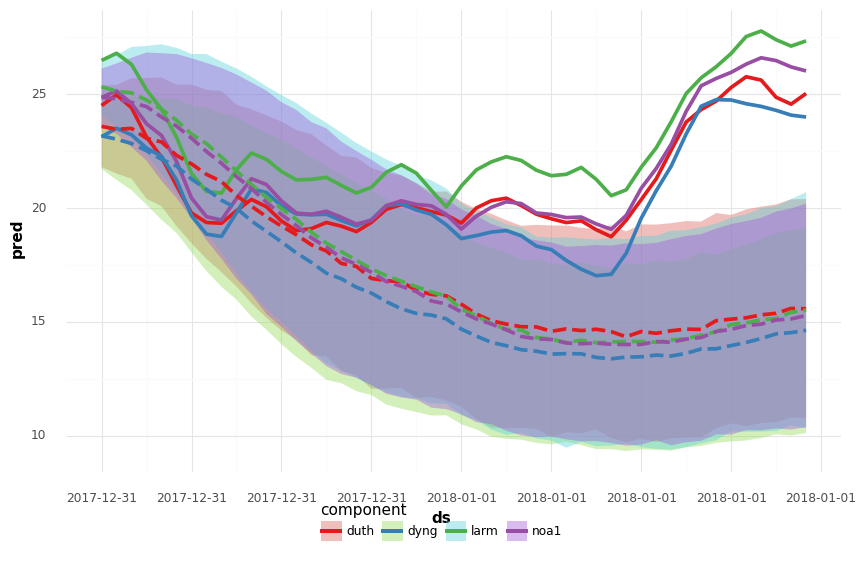

<ggplot: (8776079323989)>

In [17]:
from FCeV import METRICS
df1 = df["BASE"].head(48).copy()
pred = df1["pred"]
uncer = df1["uncer"]
current =df1["current"]
FCeVResults.plot_results(df1)

In [ ]:
scipy.stats.norm(pred[["larm"]],uncer[["larm"]] ).pdf(current[["larm"]])

In [ ]:
pd.options.plotting.backend = "plotly" 
from FCeVResults import SUMMARY_METRICS
from FCeV import METRICS
df_results = FCeVResults.predict_from_metrics(df, FCeV_results_data["df_events"], SUMMARY_METRICS.DTW, input_length, synthetic_events)
DTW = FCeV.get_metrics_from_fc(df_results[ "pred"], df_results[ "current"], METRICS.RMSE).mean() / 100
print(f"DTW: {DTW}")
df_results[[ "pred", "current"]].plot()

In [47]:
pd.options.plotting.backend = "plotly" 
from FCeVResults import SUMMARY_METRICS
from FCeV import METRICS
df_results = FCeVResults.predict_from_metrics(df, FCeV_results_data["df_events"], SUMMARY_METRICS.ZDENS, input_length, synthetic_events)
ZDENS = FCeV.get_metrics_from_fc(df_results[ "pred"], df_results[ "current"], METRICS.RMSE).mean() / 100
ZDENS_weigth = FCeV.get_metrics_from_fc(df_results[ "pred2"], df_results[ "current"], METRICS.RMSE).mean() / 100
print(f"ZDENS: {ZDENS}")
print(f"ZSCORE_weigth Total: {ZDENS_weigth}")
df_results[[ "pred","pred2", "current"]].plot()

ZDENS: 1.5485407151609665
ZSCORE_weigth Total: 1.5980434631170106


FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=pred<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'pred',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'pred',
              'showlegend': True,
              'type': 'scattergl',
              'uid': '141f834e-7b2a-4c84-a828-606d5e617df2',
              'x': array([datetime.datetime(2017, 12, 31, 23, 30),
                          datetime.datetime(2018, 1, 1, 23, 30),
                          datetime.datetime(2018, 1, 2, 23, 30), ...,
                          datetime.datetime(2020, 1, 31, 23, 30),
                          datetime.datetime(2020, 2, 1, 23, 30),
                          datetime.datetime(2020, 2, 3, 23, 30)], dtype=object),
              'xaxis': 'x',
              'y': array([69., 67., 68., ..., 72., 71., 62.]),
              'yaxis': 'y'},
             {'h

In [ ]:
pd.options.plotting.backend = "plotly" 
from FCeV import METRICS
df_results_sigma = FCeVResults.predict_from_metrics(df, df_events, SUMMARY_METRICS.RMSE_sigma, input_length, synthetic_events)
RMSE_sigma = FCeV.get_metrics_from_fc(df_results_sigma[ "pred"], df_results_sigma[ "current"], METRICS.RMSE).mean() / 100
print(f"RMSE_sigma: {RMSE_sigma}")
df_results[[ "pred", "current"]].plot()

In [ ]:
df_tab = df_results_sigma.copy()
len_test = 200
df_test = df_tab.iloc[:len_test]
df_tab = df_tab.iloc[len_test + 1:]
from FCeV import METRICS
df_resultsai = FCeVResults.predict_with_tabai(df_tab, df_test, 0.7, layers = 1000)
RMSEai = current_fcev.get_metrics_from_fc(df_resultsai["current"], df_resultsai["pred_ai"], METRICS.RMSE).mean()/100
RMSE = FCeV.get_metrics_from_fc(df_resultsai[ "pred"], df_resultsai[ "current"], METRICS.RMSE).mean() / 100
print(f"RMSE: {RMSE}")
print(f"RMSEai: {RMSEai}")
df_resultsai[[ "pred","pred_ai", "current"]].plot()

In [ ]:
pd.options.plotting.backend = "plotly" 
from FCeV import METRICS
input_length = 48
df_events
df_results = FCeVResults.predict_from_metrics(df, df_events, FCeVResults.SUMMARY_METRICS.CoV, input_length, synthetic_events)
CoV = FCeV.get_metrics_from_fc(df_results[ "pred"], df_results[ "current"], METRICS.RMSE).mean() / 100
print(f"CoV: {CoV}")
df_results[[ "pred", "current"]].plot()

In [ ]:
pd.options.plotting.backend = "plotly" 
from FCeV import METRICS
df_results = FCeVResults.predict_from_metrics(df, df_events, FCeVResults.SUMMARY_METRICS.PRESS, input_length, synthetic_events)
PRESS = FCeV.get_metrics_from_fc(df_results[ "pred"], df_results[ "current"], METRICS.RMSE).mean() / 100
print(f"PRESS Total: {PRESS}")
df_results[[ "pred", "current"]].plot()

In [ ]:
pd.options.plotting.backend = "plotly" 
from FCeV import METRICS
df_results = FCeVResults.predict_from_metrics(df, df_events, FCeVResults.SUMMARY_METRICS.RMSE, input_length, synthetic_events)
RMSE  = FCeV.get_metrics_from_fc(df_results[ "pred"], df_results[ "current"], METRICS.RMSE).mean() / 100
print(f"RMSE Total: {RMSE}")
df_results[[ "pred", "current"]].plot()

In [39]:
pd.options.plotting.backend = "plotly" 
from FCeV import METRICS
df_results = FCeVResults.predict_from_metrics(df, df_events, FCeVResults.SUMMARY_METRICS.ZSCORE, input_length, synthetic_events)
ZSCORE  = FCeV.get_metrics_from_fc(df_results[ "pred"], df_results[ "current"], METRICS.RMSE).mean() / 100
ZSCORE_weigth= FCeV.get_metrics_from_fc(df_results[ "pred2"], df_results[ "current"], METRICS.RMSE).mean() / 100
print(f"ZSCORE Total: {ZSCORE}")
print(f"ZSCORE_weigth Total: {ZSCORE_weigth}")
df_results[[ "pred","pred2", "current"]].plot()

ZSCORE Total: 2.4877910214993864
ZSCORE_weigth Total: 2.4877910214993864


FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=pred<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'pred',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'pred',
              'showlegend': True,
              'type': 'scattergl',
              'uid': '5252ffcb-900f-4f69-8716-3f766c119c67',
              'x': array([datetime.datetime(2017, 12, 31, 23, 30),
                          datetime.datetime(2018, 1, 1, 23, 30),
                          datetime.datetime(2018, 1, 2, 23, 30), ...,
                          datetime.datetime(2020, 1, 31, 23, 30),
                          datetime.datetime(2020, 2, 1, 23, 30),
                          datetime.datetime(2020, 2, 3, 23, 30)], dtype=object),
              'xaxis': 'x',
              'y': array([69., 67., 68., ..., 71., 70., 70.]),
              'yaxis': 'y'},
             {'h

In [ ]:
df_results = FCeVResults.predict_from_metrics(df, df_events, FCeVResults.SUMMARY_METRICS.RMSE, input_length, synthetic_events)

df_tab = df_results.copy()
len_test = 200
df_test = df_tab.iloc[:len_test]
df_tab = df_tab.iloc[len_test + 1:]

df_resultsai = FCeVResults.predict_with_tabai(df_tab, df_test, 0.7, layers = 1000)
RMSEai = current_fcev.get_metrics_from_fc(df_resultsai["current"], df_resultsai["pred_ai"], METRICS.RMSE).mean()/100
RMSE = FCeV.get_metrics_from_fc(df_resultsai[ "pred"], df_resultsai[ "current"], METRICS.RMSE).mean() / 100
print(f"RMSE: {RMSE}")
print(f"RMSEai: {RMSEai}")
df_resultsai[[ "pred","pred_ai", "current"]].plot()

In [ ]:
pd.options.plotting.backend = "plotly" 
from FCeV import METRICS
df_results_CosSim = FCeVResults.predict_from_metrics(df, df_events, FCeVResults.SUMMARY_METRICS.CosSim, input_length, synthetic_events)
CosSim = FCeV.get_metrics_from_fc(df_results_CosSim[ "pred"], df_results_CosSim[ "current"], METRICS.RMSE).mean() /100 
print(f"CosSim: {CosSim}")
df_results_CosSim[[ "pred", "current"]].plot()

In [ ]:
from FCeV import METRICS
df_tab = df_results_CosSim.copy()
len_test = 200
df_test = df_tab.iloc[:len_test]
df_tab = df_tab.iloc[len_test + 1:]

df_resultsai = FCeVResults.predict_with_tabai(df_tab, df_test, 0.3, layers = 1000)
CosSimai = current_fcev.get_metrics_from_fc(df_resultsai["pred_ai"], df_resultsai["current"], METRICS.RMSE).mean()/100
CosSim = FCeV.get_metrics_from_fc(df_resultsai[ "pred"], df_resultsai[ "current"], METRICS.RMSE).mean() / 100
print(f"CosSim: {CosSim}")
print(f"CosSimai: {CosSimai}")
df_resultsai[[ "pred","pred_ai", "current"]].plot()

In [ ]:
pd.options.plotting.backend = "plotly" 
from FCeV import METRICS
df_results = FCeV.predict_from_metrics(df, df_events, METRICS.ZSCORE, input_length, synthetic_events)


In [ ]:
from FCeV import METRICS
df_tab = df_results.copy()
len_test = 200
df_test = df_tab.iloc[:len_test]
df_tab = df_tab.iloc[len_test + 1:]

df_resultsai = FCeV.predict_with_tabai(df_tab, df_test, 0.3, layers = 1000)
zscoreai = current_fcev.get_metrics_from_fc(df_resultsai["current"], df_resultsai["pred_ai"], METRICS.RMSE).mean()/100
zscore = FCeV.get_metrics_from_fc(df_resultsai[ "pred"], df_resultsai[ "current"], METRICS.RMSE).mean() / 100
zscore_w = FCeV.get_metrics_from_fc(df_resultsai[ "pred2"], df_resultsai[ "current"], METRICS.RMSE).mean() / 100
print(f"ZSCORE: {zscore}")
print(f"ZSCORE- weight: {zscore_w}")
print(f"ZSCOREAI: {zscoreai}")
df_resultsai[[ "pred2", "pred","pred_ai", "current"]].plot()

In [ ]:
df_results[["pred","current"]].rolling(5, min_periods=1).mean().plot()

In [ ]:
read_df = df.copy()
from sklearn.ensemble import IsolationForest

In [ ]:
# import AnomalyExperiment and init the class
from pycaret.anomaly import AnomalyExperiment
exp = AnomalyExperiment()
# init setup on exp
exp.setup(input_df_selected, session_id = 123)

In [49]:
# create PyCaret anomaly detection model
import pycaret
exp_name = setup(data = input_df_selected)
iforest = create_model('iforest', fraction=0.00001)

NameError: name 'setup' is not defined

In [ ]:
iforest_results = assign_model(iforest)
iforest_results.head()

In [ ]:
df_truth.head()

In [ ]:
df["BASE"]["current"].head()

In [ ]:
unseen_predictions = predict_model(iforest, data=df["BASE"]["current"])
df_truth
unseen_predictions.head()

In [ ]:
from darts.ad import KMeansScorer, WassersteinScorer, CauchyNLLScorer
scorer = KMeansScorer(k=2, window=1)
df_train = df_input[df_input.index < df.index[1]]
scorer.fit(TimeSeries.from_dataframe(df_train))

In [ ]:
# import pycaret anomaly and init setup

unseen_predictions = predict_model(iforest, data=df["0_0"]["pred"])
unseen_predictions["Anomaly_Score"]

In [50]:
df_discard = df.copy()[:-48]
from pycaret.anomaly import *
df_train = df_input[df_input.index < df.index[1]]
s = setup(df_train, session_id = 123)
iforest = create_model('iforest', fraction=0.05)
iforest_results = assign_model(iforest)

,Description,Value
0,Session id,123
1,Original data shape,"(35065, 4)"
2,Transformed data shape,"(35065, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [74]:
list_anomalies = list()
for name, group in df.drop(["BASE", "EMPTY"], axis = 1).groupby(level='CF', axis = 1):
        pred = group[name]["pred"]
        current = group[name]["current"]
        uncer = group[name]["uncer"]
        value = 0 # np.random.normal(0, 1, 4)
        simulation = pred + value * uncer
        unseen_predictions = predict_model(iforest, data=simulation)
        curret_metrics = unseen_predictions[["Anomaly_Score"]]
        curret_metrics.columns = synthetic_events.loc[name].values
        list_anomalies.append(curret_metrics)
df_anomalies = pd.concat(list_anomalies, axis = 1)

In [72]:
df_anomalies.plot()

FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=60.0<br>ds=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '60.0',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> 60.0 <i style="color:#fc9944">~18h</i>',
              'showlegend': True,
              'type': 'scattergl',
              'uid': '5423e668-e427-472e-bf2f-c5393ddec0ad',
              'x': array([datetime.datetime(2017, 12, 31, 12, 0),
                          datetime.datetime(2017, 12, 31, 16, 0),
                          datetime.datetime(2018, 1, 1, 14, 0), ...,
                          datetime.datetime(2020, 2, 3, 12, 0),
                          datetime.datetime(2020, 2, 3, 17, 0),
                          datetime.datetime(2020, 2, 4, 11, 30)], dtype=object),
              'xaxis': 'x',
              'y': array([-0.17313307, -0.037

In [88]:
df_results = pd.DataFrame()
for index in range(len(df_anomalies) // input_length):
    df_test = df_anomalies.iloc[index * input_length: (index + 1) * input_length ]
    start_index = df_test.index.mean().round(freq='s')
    expected = df_events.loc[df_test.index]
    df_out = pd.DataFrame([[df_test.idxmin(1).values[0], expected.mean().values[0]]], columns = ["pred", "current"], index = [start_index])
    df_results = pd.concat([df_results, df_out])

In [89]:
df_results.plot()

FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=pred<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'pred',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'pred',
              'showlegend': True,
              'type': 'scattergl',
              'uid': 'e37f5f0e-56c6-4945-8c13-f82aada02df0',
              'x': array([datetime.datetime(2017, 12, 31, 23, 45),
                          datetime.datetime(2018, 1, 1, 23, 45),
                          datetime.datetime(2018, 1, 2, 23, 45), ...,
                          datetime.datetime(2020, 1, 31, 23, 45),
                          datetime.datetime(2020, 2, 1, 23, 45),
                          datetime.datetime(2020, 2, 3, 23, 45)], dtype=object),
              'xaxis': 'x',
              'y': array([73., 78., 73., ..., 68., 75., 71.]),
              'yaxis': 'y'},
             {'h

In [87]:
for index in range(len(df_discard) // input_length):
    df_test = df.iloc[index * input_length: (index + 1) * input_length ]
    group = df_test["BASE"]
    pred = group["pred"]
    current = group["current"]
    uncer = group["uncer"]
    value = 0 # np.random.normal(0, 1, 4)
    predictions = TimeSeries.from_dataframe(pred, fill_missing_dates=True, freq=freq)
    currents = TimeSeries.from_dataframe(pred, fill_missing_dates=True, freq=freq)
    anom_score = scorer.score(predictions)
    all_anom = pd.concat([all_anom, anom_score.pd_dataframe()])
anom_score.plot()

NameError: name 'scorer' is not defined

In [ ]:
for index in range(len(df_discard) // input_length):
    df_test = df.iloc[index * input_length: (index + 1) * input_length ]
    group = df_test["BASE"]
    pred = group["pred"]
    current = group["current"]
    uncer = group["uncer"]
    value = 0 # np.random.normal(0, 1, 4)
    predictions = TimeSeries.from_dataframe(pred, fill_missing_dates=True, freq=freq)
    currents = TimeSeries.from_dataframe(pred, fill_missing_dates=True, freq=freq)
    anom_score = scorer.score(predictions)
    all_anom = pd.concat([all_anom, anom_score.pd_dataframe()])
anom_score.plot()

In [ ]:
all_anom[-49:].plot()

In [ ]:
from pycaret.anomaly import *
from sklearn.datasets import load_breast_cancer
from darts.ad import KMeansScorer, WassersteinScorer, CauchyNLLScorer
def get_anom(df, df_input, rep, k, window):
    scorer = KMeansScorer(k=10, window=48)
    df_train = df_input[df_input.index < df.index[1]]
    scorer.fit(TimeSeries(ts_current_train))
    for name, group in df_test.drop(["BASE", "EMPTY"], axis = 1).groupby(level='CF', axis = 1):
            pred = group[name]["pred"]
            current = group[name]["current"]
            uncer = group[name]["uncer"]
            value = 0 # np.random.normal(0, 1, 4)
            simulation = pred + value * uncer
            curret_metrics = get_summary(current, simulation, metric, uncer).mean().mean()
            list_values.append(pd.DataFrame(curret_metrics, columns = synth.loc[name].values, index = [start_index]))
            
    input_df_selected = input_df[input_df.index < df.index[0]]
    all_anom_score = None
    for index in range(30):
        ts_current_val = TimeSeries.from_dataframe(current_df["current"])
        ts_pred_val = TimeSeries.from_dataframe(current_df["pred"])
        ts_current_train = current_fcev.FCeV_model.input_series.drop_after(ts_current_val.start_time())
        ts_current_all = ts_current_train.append(ts_current_val)
        ts_base_all = ts_base_train.append(ts_base_val)
        scorer = KMeansScorer(k=3, window=10)
        scorer.fit(ts_current_train)
        anom_score = scorer.score_from_prediction(ts_current_val, ts_base_val)
        if all_anom_score is None:
            all_anom_score = anom_score
        else:
            all_anom_score = all_anom_score.concatenate(anom_score, axis = "component")
            

In [ ]:

for index in range(len(df) // input_length):
        df_test = df.iloc[index * input_length: (index + 1) * input_length - 1]
        list_values = list()
        list_index = list()
        list_colums = list()
        start_index = df_test.index.mean().round(freq='s')
        expected = df_events.loc[df_test.index]
        for name, group in df_test.groupby(level='CF', axis = 1):
            pred = group[name]["pred"]
            current = group[name]["current"]
            uncer = group[name]["uncer"]
            value = 0 # np.random.normal(0, 1, 4)
            simulation = pred + value * uncer
            curret_metrics = get_summary(current, simulation, metric, uncer).mean().mean()
            list_values.append(pd.DataFrame(curret_metrics, columns = synth.loc[name].values, index = [start_index]))

In [ ]:
    if all_frames is None:
        all_frames = all_anom_score.mean(1)
    else:
        #print(f"end all {all_frames.end_time()} + start_new {all_anom_score.mean(1).start_time()}")
        all_frames = all_frames.append(all_anom_score.mean(1))

In [ ]:

df_results.plot.scatter(x = "current", y = "pred", alpha = 0.1, figsize = (10,5))

In [ ]:
pd.options.plotting.backend = 'matplotlib'
df_results[["pred", "current"]].plot.hist(by=["pred"], figsize = (10, 30), sharex=True);

In [ ]:
from darts.ad import KMeansScorer, WassersteinScorer, CauchyNLLScorer
def get_anom(df):
    df = df.sort_index()
    S = 48 * 100
    N = int(len(df)/S)
    frames = [ df.iloc[i*S:(i+1)*S].copy() for i in range(N+1) ]
    frames.pop()
    all_frames = None
    frames = [df]
    for current_df in frames: 
        all_anom_score = None
        for index in range(30):
            ts_current_val = TimeSeries.from_dataframe(current_df["current"])
            ts_pred_val = TimeSeries.from_dataframe(current_df["pred"])
            ts_current_train = current_fcev.FCeV_model.input_series.drop_after(ts_current_val.start_time())
            ts_current_all = ts_current_train.append(ts_current_val)
            ts_base_all = ts_base_train.append(ts_base_val)
            scorer = KMeansScorer(k=3, window=10)
            scorer.fit(ts_current_train)
            anom_score = scorer.score_from_prediction(ts_current_val, ts_base_val)
            if all_anom_score is None:
                all_anom_score = anom_score
            else:
                all_anom_score = all_anom_score.concatenate(anom_score, axis = "component")
        if all_frames is None:
            all_frames = all_anom_score.mean(1)
        else:
            #print(f"end all {all_frames.end_time()} + start_new {all_anom_score.mean(1).start_time()}")
            all_frames = all_frames.append(all_anom_score.mean(1))
    return all_frames.pd_dataframe()

In [ ]:
from FCeV import METRICS
metrics = {}
for key, value in all_dict.items():
    if isinstance(value, pd.DataFrame):
        df = value
        current = df["current"]
        pred = df["pred"]
        current_value = current_fcev.get_metrics_from_fc(current, pred, METRICS.RMSE).mean().mean()
        metrics[f"{key}"] = current_value
    else:
        for key_inner, value_inner in value.items():
            current = value_inner["current"]
            pred = value_inner["pred"]
            current_value = current_fcev.get_metrics_from_fc(current, pred, METRICS.RMSE).mean().mean()
            metrics[f"{synthetic_events.iloc[int(key_inner)].item()}"] = current_value


In [ ]:
metrics

In [ ]:
pred_serie = None
for key, value in all_dict.items():
    if isinstance(value, pd.DataFrame):
        df = pd.DataFrame(current_fcev.get_metrics_from_fc(value, METRICS.RMSE).mean(axis = 1))
        df.columns = [f"{key}"]
        if pred_serie is None:
            pred_serie = TimeSeries.from_dataframe(df)
        else:
            pred_serie = pred_serie.concatenate(TimeSeries.from_dataframe(df), axis = "component")
    else:
        for key_inner, value_inner in value.items():
            df = pd.DataFrame(current_fcev.get_metrics_from_fc(value_inner, METRICS.RMSE).mean(axis = 1))
            df.columns = [f"{key}_{key_inner}"]
            pred_serie = pred_serie.concatenate(TimeSeries.from_dataframe(df), axis = "component")

In [ ]:
anom_serie = None
for key, value in all_dict.items():
    if isinstance(value, pd.DataFrame):
        df = value
        df = get_anom(df)
        df.columns = [f"{key}"]
        if anom_serie is None:
            anom_serie = TimeSeries.from_dataframe(df)
        else:
            anom_serie = anom_serie.concatenate(TimeSeries.from_dataframe(df), axis = "component")
    else:
        for key_inner, value_inner in value.items():
            df = get_anom(value_inner)
            df.columns = [f"{key}_{key_inner}"]
            anom_serie = anom_serie.concatenate(TimeSeries.from_dataframe(df), axis = "component")

In [ ]:
#val_events = current_fcev.FCeV_model.events.slice_intersect(anom_serie)["pr"]
#anom_serie = anom_serie.concatenate(val_events, axis= "component")

In [ ]:
synthetic_events

In [ ]:
next_slice = anom_serie
start_point = anom_serie.start_time()
chunks = list()
chunk_len = 48
total_len = len(anom_serie)
for index in range(total_len // chunk_len  - 1) :
    current_slice, next_slice = next_slice.split_before(chunk_len)
    start_point = current_slice.end_time()
    chunks.append(current_slice.pd_dataframe())

In [ ]:
from fastcore import foundation


## USING TAB FASTAI

In [ ]:
from fastai.tabular.all import *

In [ ]:

y_name = "current"
df_tab = df_results.drop("pred",axis = 1).copy()
df_test = df_tab.iloc[:200]
df_tab = df_tab.iloc[200+1:]

min_y = np.min(df_tab[y_name]) - 1
df_tab[y_name] = np.log(df_tab[y_name] - min_y)

len_train = int(len(df_tab) * 0.8)
df_train = df_tab.iloc[:len_train];
df_val = df_tab.iloc[len_train + 1:];
len_train

In [ ]:
splits = (L(range(len(df_train))), L(range(len(df_train) + 1, len(df_train) + len(df_val))))

In [ ]:
to = TabularPandas(df_tab, procs=[FillMissing, Normalize],
                   cont_names = list(df_tab.drop(y_name, axis = 1).columns.values),
                   y_block=RegressionBlock(),
                   y_names=y_name,
                   splits=splits)
dls = to.dataloaders(bs=200)

In [ ]:
max_log_y = np.max(df_tab[y_name])*1.2
y_range = torch.tensor([0, max_log_y]); y_range
tc = tabular_config(ps=[0.2, 0.1], embed_p=0.4, y_range=y_range)
learn = tabular_learner(dls, layers=[10,50],
                        metrics=exp_rmspe,
                        config=tc,
                        loss_func=MSELossFlat())

tc = tabular_config(y_range=y_range)
learn = tabular_learner(dls,
                        metrics=exp_rmspe,
                        config=tc,
                        loss_func=MSELossFlat()
                        )
learn.lr_find()

In [ ]:
current_df = df[:10]
vector = np.linspace(0, 3000, 36)
print(len(current_df.columns.levels[2]))
np.random.normal(0,1,len(current_df.columns.levels[0]) * len(current_df.columns.levels[2]))

In [ ]:
current_df =df
random_vector  = np.random.normal(0,1,dim_0  * dim_2)
pred = pd.DataFrame(current_df.swaplevel(i = 0, j = 1, axis = 1))["pred"] 
uncer = pd.DataFrame(current_df.swaplevel(i = 0, j = 1, axis = 1))["uncer"]
current  =   pd.DataFrame(current_df.swaplevel(i = 0, j = 1, axis = 1))["current"]
error = (pred + (random_vector * uncer) - current).pow(2)

In [ ]:
error.mean(1, level= 0)

In [ ]:
pd.DataFrame(error.to_records(index=False)).to_numpy()

In [ ]:
current_df = df[:10]

In [ ]:

learn.fit_one_cycle(100)

In [ ]:
dl = learn.dls.test_dl(df_test)
raw_test_preds = learn.get_preds(dl=dl)
learn.validate(dl=dl)
test_preds = (np.exp(raw_test_preds[0])+ min_y).numpy().T[0]
df_test["new_pred"] = test_preds
pd.options.plotting.backend = "plotly" 
from FCeV import METRICS
print(current_fcev.get_metrics_from_fc(df_test.head(200)["current"], df_test.head(200)["new_pred"], METRICS.RMSE).mean()/100)
df_test[["current", "new_pred"]].plot()

## Using Pythorch Lightning

In [ ]:
import pytorch_lightning as pl
import pandas as pd
import cv2
import os 
from torch import nn
from torch.utils.data import Dataset ,DataLoader
import numpy as np
import torch
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from torcheval.metrics import BinaryAccuracy
import torchmetrics
#df_input =  anom_serie.pd_dataframe().drop("BASE", axis = 1)
#df_input =  pred_serie.pd_dataframe().drop("BASE", axis = 1)
df_input = df
df_label =  df_events.loc[df_input.index]


dim_0 = len(df_input.columns.levels[0])
dim_1 = len(df_input.columns.levels[1])
dim_2 = len(df_input.columns.levels[2])
channels = (dim_0)

CLASSES = 2
input_length = 48
kernel_size = 16
channel_1 = 128
channel_2 = 64
internal_size = 32

In [ ]:
class CassavaModel(pl.LightningModule):
    def __init__(self,dropout):
        
      #image_size = 64
        super().__init__()
        self.cnv_1 = nn.Conv1d(channels,channel_1,kernel_size, padding='same')

        self.bn_1 = nn.BatchNorm1d(channel_1)
        self.mxpool = nn.MaxPool1d(2)
        
        self.cnv_2 = nn.Conv1d(channel_1,channel_2,kernel_size // 2, padding='same')
        self.bn_2 = nn.BatchNorm1d(channel_2)

        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(input_length  * channel_2 // 4,internal_size)
        self.fc2 = nn.Linear(internal_size,internal_size)
        self.fc3 = nn.Linear(internal_size,1)
        self.softmax = nn.Softmax()
        self.accuracy = BinaryAccuracy()
        self.loss_fn = torch.nn.MSELoss()
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(dropout)
    
    def forward(self,x):
        out = self.bn_1(self.dropout(self.relu(self.cnv_1(x))))
        out = self.mxpool(out)
        out = self.bn_2(self.dropout(self.relu(self.cnv_2(out))))
        out = self.flat(self.mxpool(out))
        out = self.dropout(self.relu(self.fc1(out)))
        out = self.dropout(self.relu(self.fc2(out)))
        out = self.fc3(out)
        #out = self.sigmoid(out)
        return out

    
    def configure_optimizers(self):
        LR = 1e-3
        optimizer = torch.optim.AdamW(self.parameters(),lr=LR)
        return optimizer

    def training_step(self,batch,batch_idx):
        x,y = batch["x"],batch["y"]
        img = x.view(-1,channels,input_length)
        label = y.view(-1)
        out = self(img)
        
        loss = self.loss_fn(out,label)
        self.log('train_loss', loss)
        return loss       

    def validation_step(self,batch,batch_idx):
        x,y = batch["x"],batch["y"]
        img = x.view(-1,channels,input_length)
        label = y.view(-1)
        out = self(img)
        loss = self.loss_fn(out,label) 
        self.log('valid_loss', loss,prog_bar=True)
        return loss

    def predict_step(self, batch, batch_idx, dataloader_idx=0):
        x,y = batch["x"],batch["y"]
        img = x.view(-1,channels,input_length)
        label = y.view(-1)
        preds = self(img)
        preds = self.trainer.datamodule.min_max_scaler_y.inverse_transform(preds.cpu())
        current  = self.trainer.datamodule.min_max_scaler_y.inverse_transform(y.cpu())
        return current, preds
    
    def test_step(self,batch,batch_idx):
        x,y = batch["x"],batch["y"]
        img = x.view(-1,channels,input_length)
        label = y.view(-1)
        out = self(img)
        
        loss = self.loss_fn(out,label)
        self.log('test_loss', loss)
        return loss       

In [ ]:
class CassavaDataset(Dataset):
    def __init__(self,df_input, df_events, input_length, weigth_uncer):
        self.df_input = df_input
        self.df_events = df_events
        self.input_length = input_length
        self.weigth_uncer = weigth_uncer
        self.dim_0 = len(df_input.columns.levels[0])
        self.dim_1 = len(df_input.columns.levels[1])
        self.dim_2 = len(df_input.columns.levels[2])
    def __len__(self):
        return len(self.df_input) //  input_length
    
    def __getitem__(self,item):
        #index_selected = [item * input_length : ((item + 1) * input_length)]
        current_df = self.df_input[item * input_length : ((item + 1) * input_length)]
        random_vector  = np.random.normal(0,1,self.dim_0  * self.dim_2)
        pred = pd.DataFrame(current_df.swaplevel(i = 0, j = 1, axis = 1))["pred"] 
        uncer = pd.DataFrame(current_df.swaplevel(i = 0, j = 1, axis = 1))["uncer"]
        current  =   pd.DataFrame(current_df.swaplevel(i = 0, j = 1, axis = 1))["current"]
        error = 0.01 +  ((pred + (self.weigth_uncer * random_vector * uncer))- current).mean(1, level = 0).pow(2).pow(1/2) 
        x = preprocessing.MinMaxScaler().fit_transform(error.values)
        #x = pd.DataFrame(error.to_records(index=False)).to_numpy()
        y = self.df_events[item * input_length : ((item + 1) * input_length)].mean()
        return {
            "x":torch.tensor(x,dtype=torch.float),
            "y":torch.tensor(y,dtype=torch.float),
        } 

In [ ]:
class CassavaLightDataset(pl.LightningDataModule):
    def __init__(self,df_input, df_label,input_length, test_part, batch_size=100):
        super().__init__()
        self.batch_size = batch_size
            
        self.min_max_scaler_y = preprocessing.MinMaxScaler()
        self.min_max_scaler_x = preprocessing.MinMaxScaler()
        self.df_input = df_input
        self.df_label = df_label
        self.test_part = test_part
        self.input_length = input_length


        
    def setup(self,stage=None):
        
        train_X,test_X, train_Y, test_Y  = train_test_split(self.df_input, self.df_label, test_size = self.test_part, shuffle = False)
        
        train_X_scaled = self.min_max_scaler_x.fit_transform(train_X.values)
        df_train_X_scaled = pd.DataFrame(train_X_scaled, columns = train_X.columns, index = train_X.index)
        
        train_X_scaled = train_X
        
        test_X_scaled = self.min_max_scaler_x.transform(test_X.values)
        self.test_X = pd.DataFrame(test_X_scaled, columns = test_X.columns, index = test_X.index)
        self.test_X = test_X
        
        ## LABEL TRAIN
        train_y_scaled = self.min_max_scaler_y.fit_transform(train_Y.values)
        df_train_y_scaled = pd.DataFrame(train_y_scaled, columns = train_Y.columns, index = train_Y.index)
        
        ## LABEL TEST
        test_y_scaled = self.min_max_scaler_y.transform(test_Y.values)
        self.test_Y = pd.DataFrame(test_y_scaled, columns = test_Y.columns, index = test_Y.index)
        
        self.train_X,self.val_X, self.train_Y, self.val_Y   = train_test_split(df_train_X_scaled,df_train_y_scaled, test_size = 0.1,shuffle = False)
        
        self.train_dataset = CassavaDataset(self.train_X, self.train_Y, self.input_length, 0)
        self.validation_dataset = CassavaDataset(self.val_X, self.val_Y, self.input_length,0)
        self.predict_dataset = CassavaDataset(self.test_X, self.test_Y, self.input_length,0)
    def train_dataloader(self):
        train_loader = DataLoader(self.train_dataset,
                            batch_size=self.batch_size, drop_last=True,
                            
                            shuffle=False)
        return train_loader
    def val_dataloader(self):
        valid_loader = DataLoader(self.validation_dataset,
                            batch_size=self.batch_size,drop_last=True,
                            shuffle=False) 
        return valid_loader
        
    def test_dataloader(self):
        test_loader = DataLoader(self.predict_dataset,
                            batch_size=self.batch_size,drop_last=True,
                            shuffle=False) 
        return test_loader
    def predict_dataloader(self):
        predict_loader = DataLoader(self.predict_dataset,
                            batch_size=len(self.predict_dataset),
                            shuffle=False)    
        return predict_loader

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='valid_loss',
    dirpath='./',
    filename='models-{epoch:02d}-{valid_loss:.2f}',
    save_top_k=3,
    mode='min') 

mod = CassavaModel(0.3)
dx = CassavaLightDataset(df_input, df_label,48, 0.2,batch_size=50)
trainer = pl.Trainer(gpus=-1,max_epochs=100,callbacks=[checkpoint_callback])
trainer.fit(model=mod,datamodule=dx) 


In [ ]:
trainer.test(dataloaders=dx.train_dataloader(), ckpt_path="best")

In [ ]:
predictions = trainer.predict(mod, dataloaders=dx.train_dataloader(), ckpt_path="best")

In [ ]:
# (1) load the best checkpoint automatically (lightning tracks this for you)

predictions = trainer.test(datamodule = dx, ckpt_path="best")

In [ ]:
# test the model
predictions = trainer.predict(mod, dataloaders=dx.predict_dataloader(), ckpt_path="best")

In [ ]:
pd.DataFrame([predictions[0][0].flatten(), predictions[0][1].flatten()]).T.plot()

In [ ]:
predictions

In [ ]:
len(chunks)

In [ ]:
current_series

In [ ]:
anom_serie.columns = ["NO"]

In [ ]:
from darts import TimeSeries
current_fcev = FCeV(FCev_config, darts_FCeV_config, df_signal, df_covariates,df_events,  output_path, df_synth)
    
iteration = 0
date_start = pd.Timestamp(2017, 1, 1)
current_fcev.create_folds(date_start, 12)
from func_timeout import func_set_timeout, FunctionTimedOut
@func_set_timeout(3600)
def train_with_timeout(fcev_instance, iteration):
    df_fore = current_fcev.process_fold(iteration)
    return df_fore
try:
    df_fore = train_with_timeout(current_fcev, iteration)
except FunctionTimedOut: 
    print(np.nan)

In [ ]:
df_fore["SYNTH_0"].keys()




In [ ]:
df_main = df_fore["BASE"]
df_synth_1 = df_fore["SYNTH_0"]["1"]
df_synth_3 = df_fore["SYNTH_0"]["3"]
df_synth_5 = df_fore["SYNTH_0"]["5"]
df_synth_6 = df_fore["SYNTH_0"]["6"]
df_synth_8 = df_fore["SYNTH_0"]["8"]
df_real = current_fcev.FCeV_model.input_series.pd_dataframe()

In [ ]:
import matplotlib.pyplot as plt
df_main = df_fore["BASE"]
df_synth_0 = df_fore["SYNTH_0"]["0"]
df_synth_1 = df_fore["SYNTH_0"]["1"]
df_synth_2 = df_fore["SYNTH_0"]["2"]
#ts_base_val.plot()
(get_anom(df_main)).plot(label="No event", c="orangered", lw=3)
#(get_anom(df_real)).plot(label="Real", c="red", lw=3)
(get_anom(df_synth_0)).plot(label="0 days after", c="blue", lw=3)
(get_anom(df_synth_1)).plot(label="1 days after", c="green", lw=3)
(get_anom(df_synth_2)).plot(label="2 days after", c="cyan", lw=3)

In [ ]:
TimeSeries.from_dataframe(main_df["pred"])

In [ ]:
from FCeV import METRICS
main_df = df_fore["BASE"]
#second_df = df_fore["SYNTH_0"]["5"]
print(current_fcev.get_metrics_from_fc(main_df, METRICS.RMSE).mean().mean())
print(current_fcev.get_metrics_from_fc(second_df, METRICS.RMSE).mean().mean())

In [ ]:
main_df = df_fore["BASE"]

In [ ]:
main_df.stack(level=1).reset_index(1).columns

In [ ]:
second_df= main_df.stack(level=1).reset_index(1)

In [ ]:
second_df["uncer_min"] = second_df['pred'] - second_df['uncer']
second_df["uncer_max"] = second_df['pred'] + second_df['uncer']

second_df["uncer_min"] = second_df['pred'] 
second_df["uncer_max"] = second_df['pred']

In [ ]:
from plotnine import ggplot, aes, facet_grid, labs, geom_line,geom_point, theme, geom_ribbon,theme_minimal,scale_color_brewer
from plotnine_prism import *
(
    ggplot(second_df.reset_index())  # What data to use
    + aes(x="ds")  # What variable to use
    + geom_ribbon(aes(y = "pred", ymin = "uncer_min", ymax = "uncer_max", fill = "component"), alpha = .4) 
    + geom_line(aes(y="current", color = "component"),size = 1.5)  # Geometric object to use for drawing
    + geom_line(aes(y="pred", color = "component"),linetype="dashed",size = 1.5 )  # Geometric object to use for drawing
    + theme_minimal() 
    +theme(legend_position="bottom", figure_size=(18, 12))
    + scale_color_brewer(type="qual", palette="Set1")
)

In [ ]:
from FCeV import METRICS
current_fcev.get_metrics_from_fc(df_fore["BASE"], METRICS.RMSE).mean().mean()

In [ ]:
current_fcev.get_metrics_from_fc(df_fore["SYNTH_2"]["8"], METRICS.RMSE).mean().mean()

In [ ]:
df_fore["BASE"].plot()

In [ ]:
df_fore["SYNTH_5"]["24"].plot()

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
# before starting, we define some constants
num_samples = 200

figsize = (9, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [ ]:
train_day = dateutil.parser.parse("2018-09-30")
val_day = dateutil.parser.parse("2018-12-31")
series = TimeSeries.from_dataframe(df_ion[df_ion.index < val_day], fill_missing_dates=False, freq=freq)
series = series.astype(np.float32)
filler = MissingValuesFiller()
tec_series = filler.transform(series, method = "from_derivatives")

# Create training and validation sets:
train_tec, val_tec = tec_series.split_after(pd.Timestamp(train_day))

# We'll use the month as a covariate
scaler_tec = Scaler()
train_tec = scaler_tec.fit_transform(train_tec)
val_tec = scaler_tec.transform(val_tec)
tec_series = scaler_tec.transform(tec_series)



In [ ]:
widths = [4, 4, 3, 3, 6, 6, 6 ,6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 5, 7, 3, 4, 6, 4, 6, 5, 6, 6, 6, 9, 9, 9, 9, 3]
ion_data = pd.read_fwf('/home/carloscano/data/ion/ionosphere_parameters_data.txt', widths = widths, header=None)
id_ion = ["year", "doy", "hour", "id imf", "B scalar", "B vector", "Lat B", "Long B", "BY", "Bz", "SW Plasma Ta", "SW Proton", "SW Plasma Speed", "SW Plasma flow long", "SW Plasma Speed lat", "Alpha ratio", "Flow pressure", "Alfen", "Magneto", "Quasy", "Kp", "N sunspot", "Dst-index", "Ap index", "f107", "AE", "AL", "AU", "pc", "lyman", "Proton10", "Proton30", "Proton60", "Flux" ]
ion_data.columns = id_ion
strfmt = "{year}-{doy:0=3d}T{hour:0=2d}:00:00"

ion_data["datetime"] = ion_data.apply(lambda x: datetime.strptime(strfmt.format(year = int(x["year"]), doy = int(x["doy"]), hour = int(x["hour"])),"%Y-%jT%H:%M:%S"), axis = 1)

ion_data = ion_data.drop(["year", "doy", "hour"], axis = 1).set_index("datetime")

ion_data = ion_data[["Kp", "f107", "N sunspot"]]

In [ ]:
df_input

In [ ]:

ion_ts = TimeSeries.from_dataframe(ion_data[ion_data.index < val_day], fill_missing_dates=True, freq = "1H").resample(freq=freq)
ion_ts = ion_ts.astype(np.float32)
scaler_ion = Scaler()
ion_ts = scaler_ion.fit_transform(ion_ts)
# Create training and validation sets:
train_ion, val_ion = ion_ts.split_after(pd.Timestamp(train_day))

In [ ]:
my_model_TCN = TCNModel(
    input_chunk_length=48*5,
    output_chunk_length=48,
    n_epochs=40,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,    
    log_tensorboard=True,
     force_reset=True,
        pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },

)

my_model = RNNModel(
    model="RNN",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={"lr": 1e-3},
    model_name="Ion_RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)

In [ ]:
%%time

my_model_TCN.fit(
    train_tec,
    past_covariates=ion_ts,
    verbose=True,
)

In [ ]:
my_model_TCN.predict(100, past_covariates=ion_ts).plot()

In [ ]:
my_model_TCN.predict(10)

In [ ]:
from darts.ad import KMeansScorer,ForecastingAnomalyModel
scorer = KMeansScorer(k=5, window=20)

In [ ]:
ad_model = ForecastingAnomalyModel(my_model_TCN, scorer)
scorer.fit(train_tec)

In [ ]:
#anom_score = ad_model.score(val_tec,    past_covariates=ion_ts)

In [ ]:
%%time
ad_model.show_anomalies(val_tec,    past_covariates=ion_ts)

In [ ]:
train_tec.plot()

In [ ]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train_tec))
binary_anom = detector.detect(anom_score)

In [ ]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [ ]:
# Scale so that the largest value is 1.
# This way of scaling perserves the sMAPE
scaler = Scaler(scaler=MaxAbsScaler())
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

In [ ]:
for i in [10, 50, 100, 150, 250, 350]:
    plt.figure(figsize=(15, 5))
    all_series_fp32[i].plot(label="{}".format(i, lw=1))

In [ ]:
from darts.explainability.shap_explainer import ShapExplainer
from darts.models import RegressionModel

In [ ]:
model = RegressionModel(lags=24, lags_future_covariates = [24,24], output_chunk_length = 24)
model.fit(train_tec, future_covariates=ion_ts)

## DALEX

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
# before starting, we define some constants
num_samples = 200

figsize = (25, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [ ]:
# Read data
series = AirPassengersDataset().load()

# we convert monthly number of passengers to average daily number of passengers per month
series = series / TimeSeries.from_series(series.time_index.days_in_month)
series = series.astype(np.float32)

# Create training and validation sets:
training_cutoff = pd.Timestamp("19571201")
train, val = series.split_after(training_cutoff)

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

# create year, month and integer index covariate series
covariates = datetime_attribute_timeseries(series, attribute="year", one_hot=False)
covariates = covariates.stack(
    datetime_attribute_timeseries(series, attribute="month", one_hot=False)
)
covariates = covariates.stack(
    TimeSeries.from_times_and_values(
        times=series.time_index,
        values=np.arange(len(series)),
        columns=["linear_increase"],
    )
)
covariates = covariates.astype(np.float32)

# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
cov_train, cov_val = covariates.split_after(training_cutoff)
scaler_covs.fit(cov_train)
covariates_transformed = scaler_covs.transform(covariates)

In [ ]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]
input_chunk_length = 48 * 5
forecast_horizon = 48
my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=1000,
    n_epochs=2,
    add_relative_index=False,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
            pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)


In [ ]:
my_model.fit(train_tec, future_covariates=ion_ts, verbose=True)

In [ ]:
def eval_model(model, n, actual_series, val_series):
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    pred_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

    plt.title("MAPE: {:.2f}%".format(mape(val_series, pred_series)))
    plt.legend()


In [ ]:
eval_model(my_model, 48, tec_series, val_ion)

In [ ]:
forecast_horizon = 48
backtest_series = my_model.historical_forecasts(
    series_transformed,
    future_covariates=covariates_transformed,
    start=train.end_time() + train.freq,
    num_samples=num_samples,
    forecast_horizon=forecast_horizon,
    stride=forecast_horizon,
    last_points_only=False,
    retrain=False,
    verbose=True,
)

In [ ]:
def eval_backtest(backtest_series, actual_series, horizon, start, transformer):
    plt.figure(figsize=figsize)
    actual_series.plot(label="actual")
    backtest_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    backtest_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)
    plt.legend()
    plt.title(f"Backtest, starting {start}, {horizon}-months horizon")
    print(
        "MAPE: {:.2f}%".format(
            mape(
                transformer.inverse_transform(actual_series),
                transformer.inverse_transform(backtest_series),
            )
        )
    )

In [ ]:
eval_backtest(
    backtest_series=concatenate(backtest_series),
    actual_series=series_transformed,
    horizon=forecast_horizon * 10,
    start=training_cutoff,
    transformer=transformer,
)

In [ ]:
my_model = TCNModel(
    input_chunk_length=48*5,
    output_chunk_length=24,
    n_epochs=2,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,    
    log_tensorboard=True,
     force_reset=True,

)

In [ ]:
def retrain_func(pred_time, train_series, past_covariates, future_covariates):
    print(len(past_covariates))
    return True

In [ ]:
backtest = model_air.historical_forecasts(
    series=tec_filled,
    past_covariates=ion_ts,
    start=0.90,
    forecast_horizon=1,
    retrain=False,
    verbose=False,
    last_points_only = False,
)

In [ ]:
def plot_backtest(ts_actual, ts_backtest):
    ts_actual[ts_backtest.time_index].plot(label="actual")
    ts_backtest.plot(label="backtest (H=6)")
    plt.legend()


In [ ]:
plot_backtest(tec_filled, backtest[5])

In [ ]:
len(filled)*0.01

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel
from darts.metrics import mape
from darts.datasets import AirPassengersDataset

In [ ]:
# Read data:
series = AirPassengersDataset().load()
series = series.astype(np.float32)

# Create training and validation sets:
train, val = series.split_after(pd.Timestamp("19590101"))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [ ]:
my_model = RNNModel(
    model="RNN",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={"lr": 1e-3},
    model_name="Air_RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)
my_model.fit(train_transformed, val_series=val_transformed)